In [1]:
from scipy import io
import GPy
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb

 C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning:No labelled objects found. Use label='...' kwarg on individual plots.


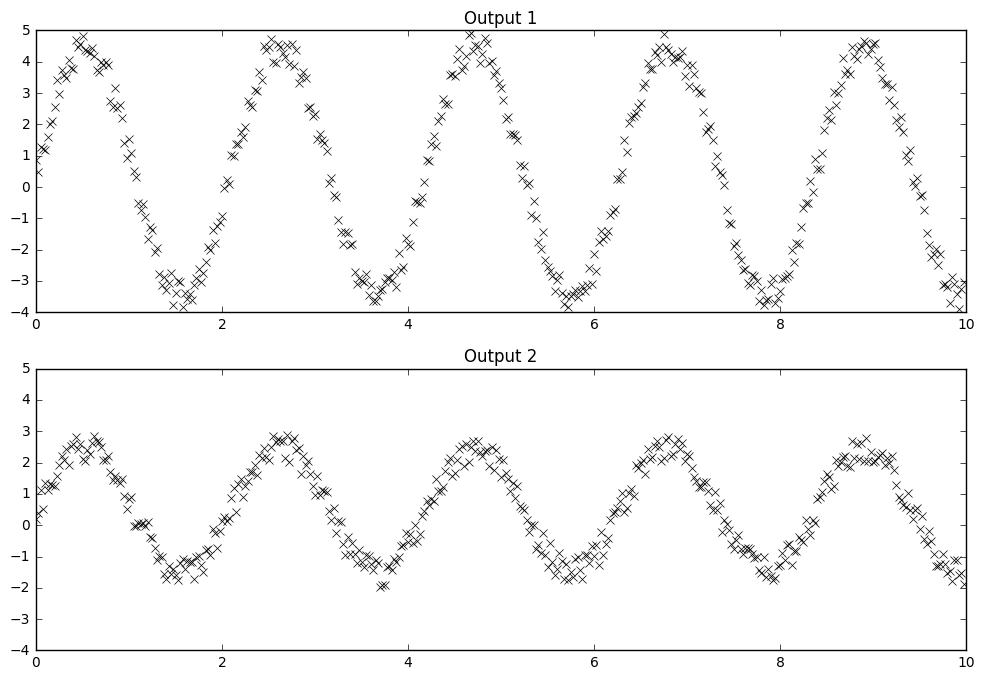

In [4]:
x1 = np.arange(0,10,0.025)[:,None]
y1 = np.zeros(len(x1))[:,None]
y2 = np.zeros(len(x1))[:,None]
for i in range(len(x1)):
    y1[i] = 4 * np.sin(3*x1[i]) + np.random.rand()
    y2[i] = 2 * np.sin(3*x1[i]) + np.random.rand()
xlim = (0,10)
fig = pb.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax1.set_xlim(xlim)
ax1.set_title('Output 1')
ax1.plot(x1[:,:1],y1,'kx')
ax1.legend()
ax2 = fig.add_subplot(212)
ax2.set_xlim(xlim)
ax2.set_ylim([-4,5])
ax2.set_title('Output 2')
ax2.plot(x1[:,:1],y2,'kx')
plt.show()

In [5]:
K1 = GPy.kern.RBF(1)
# K2 = GPy.kern.PeriodicExponential(1)
lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1])

In [6]:
m = GPy.models.GPCoregionalizedRegression([x1,x1[0:300]],[y1,y2[0:300]],kernel=lcm)
m.optimize()

In [11]:
def plot_2outputs(m,xlim,x_1,x_2):
    fig = pb.figure(figsize=(14,12))
    ax = fig.add_subplot(111) 
    
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.tick_params(labelsize=20)
    ax1.set_ylabel(r'$y_{1}$',fontsize=24)
    ax1.set_title('Output 1',fontsize=20)
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,len(x_1)),ax=ax1,legend=False)

    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.tick_params(labelsize=20)
    ax2.set_xlabel(r'$x$',fontsize=24)
    ax2.set_ylabel(r'$y_{2}$',fontsize=24)
    ax2.set_title('Output 2',fontsize=20)
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(len(x_1),len(x_1)+len(x_2)),ax=ax2,legend=False)
    
    fig.savefig('2_2.png',bbox_inches='tight')

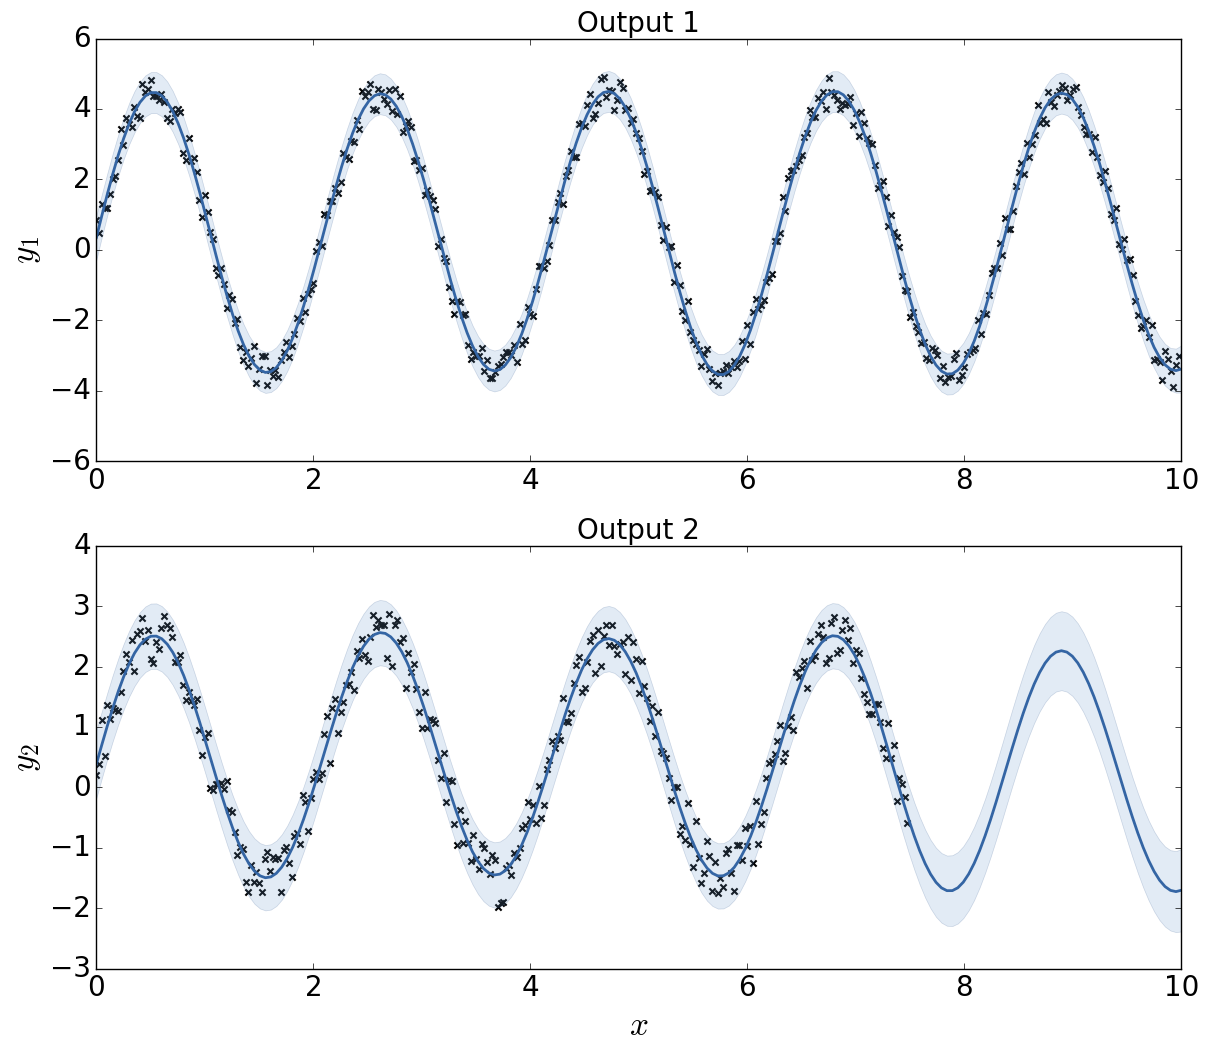

In [12]:
plot_2outputs(m,xlim=(0,10),x_1=x1,x_2=x1)
plt.show()

In [8]:
def build_XI(input_list):
    num_outputs = len(input_list)
#     Y = np.vstack(output_list)
    I = np.hstack( [np.repeat(j,_x.shape[0]) for _x,j in zip(input_list,range(num_outputs))] )
    X = np.vstack(input_list)
    X = np.hstack([X,I[:,None]])
    I = {'output_index':I[:,None]}
    return X,I

In [9]:
x = np.arange(0,100,0.1)[:,None]
X,I = build_XI([x,x])
mean, var = m.predict(X,Y_metadata=I)

In [10]:
plt.plot(x,mean[len(x):2*len(x)])

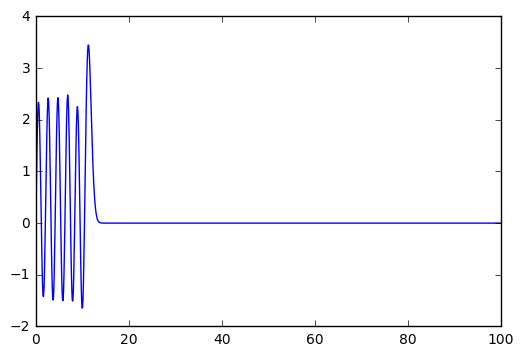

In [11]:
plt.show()